In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df['Classes'].value_counts()

Classes
1              122
not fire        60
fire            53
fire             4
fire             2
not fire         2
not fire         1
Name: count, dtype: int64

In [24]:
df['Classes'].value_counts()

Classes
1              122
not fire        60
fire            53
fire             4
fire             2
not fire         2
not fire         1
Name: count, dtype: int64

In [16]:
##ENCODING
df['Classes']=np.where(df['Classes'].str.contains("Not Fire"),0,1)

In [25]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
240,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
241,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
242,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
243,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


In [26]:
df['Classes'].value_counts()

Classes
1              122
not fire        60
fire            53
fire             4
fire             2
not fire         2
not fire         1
Name: count, dtype: int64

In [28]:
##Independent And Dependent Features
X=df.drop('FWI',axis =1)
Y=df['FWI']

In [29]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0


In [30]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    1.0
240    1.0
241    1.0
242    1.0
243    1.0
Name: FWI, Length: 244, dtype: float64

In [32]:
pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- --------------------

In [34]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [40]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_train_numeric.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,0.936322,0.942700,-0.077608,0.981934,0.643994,0.643644,0.602382,0.641903,-0.986454
RH,0.936322,1.000000,0.957393,0.087473,0.891533,0.493002,0.500880,0.389195,0.492271,-0.975033
Ws,0.942700,0.957393,1.000000,0.107038,0.905505,0.561396,0.575491,0.486686,0.564154,-0.966468
Rain,-0.077608,0.087473,0.107038,1.000000,-0.171163,-0.226304,-0.242648,-0.325147,-0.233093,-0.006547
FFMC,0.981934,0.891533,0.905505,-0.171163,1.000000,0.699797,0.693658,0.691522,0.696634,-0.957084
DMC,0.643994,0.493002,0.561396,-0.226304,0.699797,1.000000,0.972770,0.828249,0.996823,-0.577996
DC,0.643644,0.500880,0.575491,-0.242648,0.693658,0.972770,1.000000,0.798404,0.987222,-0.580118
ISI,0.602382,0.389195,0.486686,-0.325147,0.691522,0.828249,0.798404,1.000000,0.824713,-0.516739
BUI,0.641903,0.492271,0.564154,-0.233093,0.696634,0.996823,0.987222,0.824713,1.000000,-0.576023
Region,-0.986454,-0.975033,-0.966468,-0.006547,-0.957084,-0.577996,-0.580118,-0.516739,-0.576023,1.000000


<Axes: >

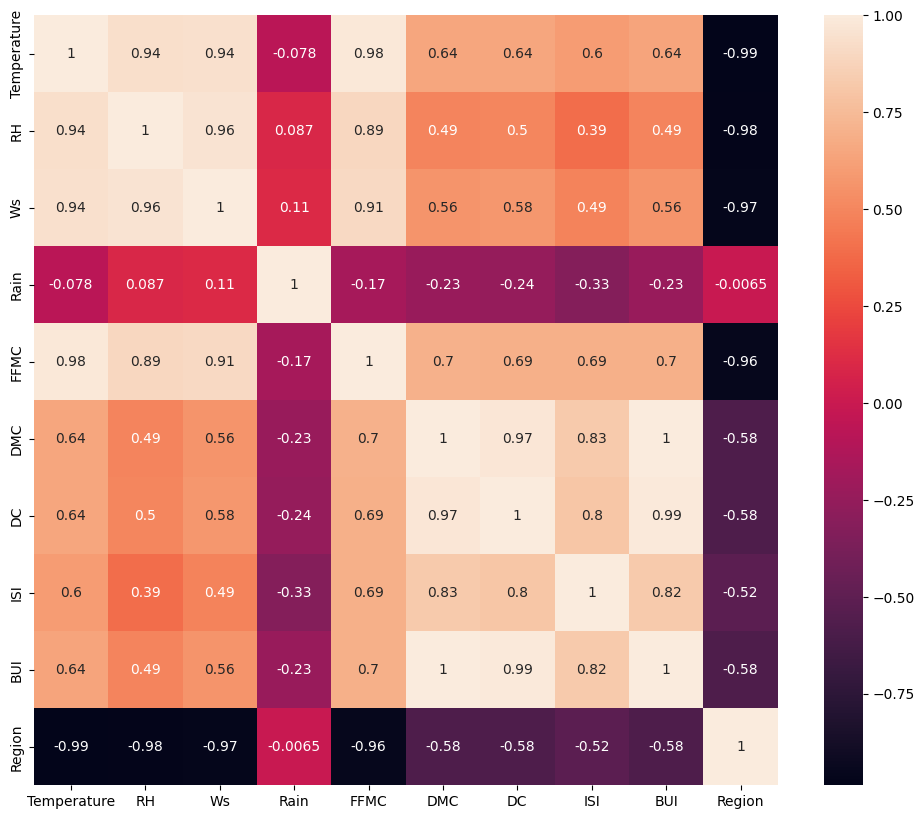

In [48]:
#Check for Multicollinearity
plt.figure(figsize=(12,10))
corr=X_train_numeric.corr()
sns.heatmap(corr,annot=True)

In [55]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i.j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [59]:
#threshold--Domain expertise
def correlation(dataset, threshold):
    col_corr = set()
    # Select only numeric columns
    corr_matrix = dataset.select_dtypes(include=['number']).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr





In [60]:
# Call the function
corr_features = correlation(X_train, 0.85)

In [61]:
corr_features

set()

In [63]:
#drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 5), (61, 11))

FEATURE SCALING Or Standardization

In [66]:
# 1. Create a copy if not done
df_copy = df.copy()

# 2. Clean the 'Classes' column
df_copy['Classes'] = df_copy['Classes'].str.strip().str.lower()

# 3. Encode it to 0 and 1
df_copy['Classes'] = df_copy['Classes'].apply(lambda x: 0 if x == 'not fire' else 1)


In [67]:
X = df_copy.drop(columns=['Classes'])  # Features
y = df_copy['Classes']                 # Target


In [68]:
X = X.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)  # Clean strings
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [71]:
X_train_scaled

array([[ 0.8562916 ,  0.88001262,  1.326513  , ..., -0.18771658,
        -0.50463175, -1.00547949],
       [-0.98107781, -0.96971957, -0.96120104, ..., -0.57288416,
        -0.44506546,  0.99455037],
       [-0.98107781, -0.96971957, -0.96120104, ..., -0.57288416,
        -0.44506546,  0.99455037],
       ...,
       [ 0.59381026,  1.19793534,  1.07232255, ..., -0.50868956,
        -0.62376434, -1.00547949],
       [-0.98107781, -0.96971957, -0.96120104, ..., -0.57288416,
        -0.44506546,  0.99455037],
       [ 0.92191194,  1.2268374 ,  1.58070345, ..., -0.46054362,
        -0.58405347, -1.00547949]], shape=(183, 11))

BOX PLOT TO UNDERSTANT THE EFFECTS OF STANDARD SCALER

Text(0.5, 1.0, 'X_train After Scaling')

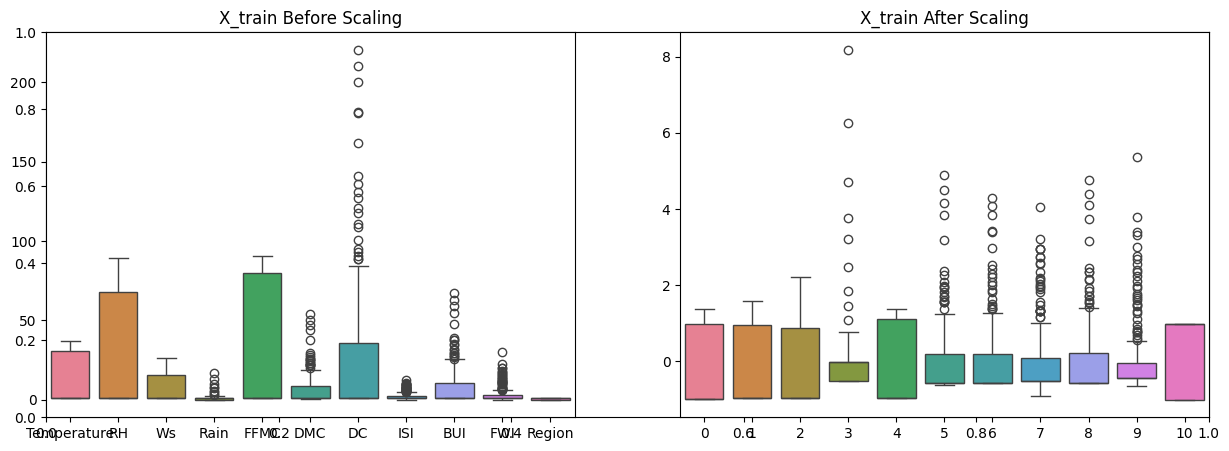

In [72]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean Absolute Error 4.349435201799947e-15
R2 Score 1.0


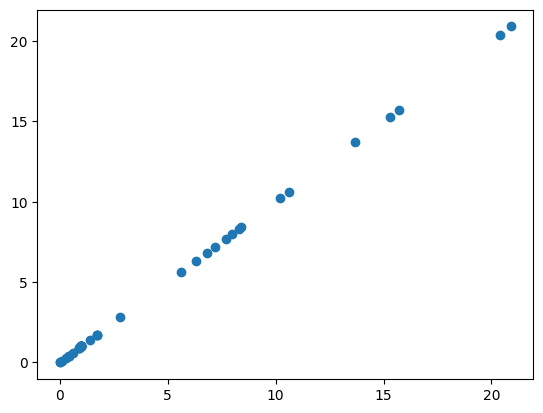

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
Y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(Y_test,Y_pred)

Mean Absolute Error 0.7206135904946582
R2 Score 0.9605186646247315


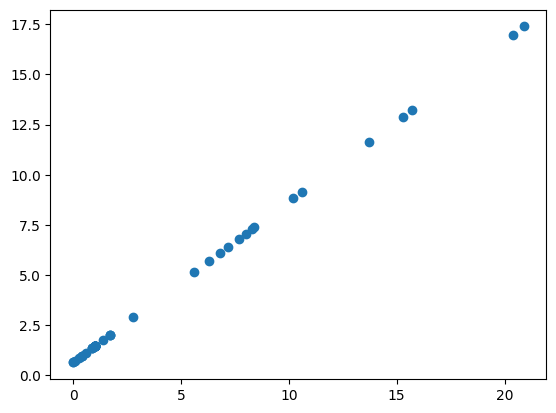

In [77]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(Y_test,Y_pred)

CROSS VALIDATION LASSO

In [78]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [79]:
lassocv.alpha_

np.float64(0.005036405372852529)

In [80]:
lassocv.mse_path_

array([[1.54530502e+01, 2.71359746e+01, 1.14803562e+01, 4.65917177e+01,
        2.19406790e+01],
       [1.34402750e+01, 2.44267881e+01, 9.98502837e+00, 4.65917177e+01,
        1.90828836e+01],
       [1.16896657e+01, 2.12451746e+01, 8.68446846e+00, 4.65917177e+01,
        1.65973190e+01],
       [1.01670751e+01, 1.84779694e+01, 7.55330778e+00, 4.65917177e+01,
        1.44355017e+01],
       [8.84280344e+00, 1.60711954e+01, 6.56948191e+00, 4.24031932e+01,
        1.25552632e+01],
       [7.69101947e+00, 1.39779062e+01, 5.71380034e+00, 3.68804572e+01,
        1.09199276e+01],
       [6.68925652e+00, 1.21572700e+01, 4.96957215e+00, 3.20773831e+01,
        9.49759616e+00],
       [5.81797418e+00, 1.05737734e+01, 4.32228042e+00, 2.78999561e+01,
        8.26052478e+00],
       [5.06017724e+00, 9.19652891e+00, 3.75929908e+00, 2.42666750e+01,
        7.18458319e+00],
       [4.40108411e+00, 7.99867184e+00, 3.26964663e+00, 2.11063263e+01,
        6.24878407e+00],
       [3.82783852e+00, 6.9568

Mean Absolute Error 0.003567647641692439
R2 Score 0.9999989973143947


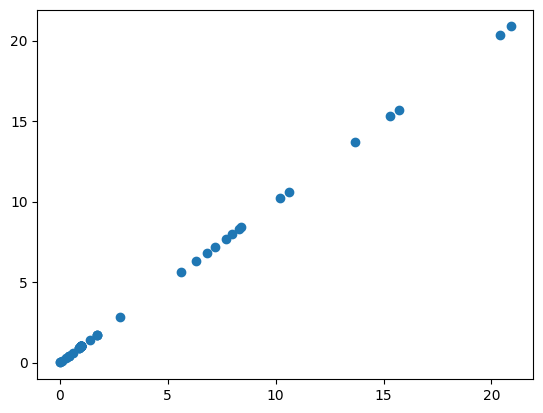

In [81]:
Y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute Error",mae)
print("R2 Score", score)

RIDGE REGRESSION MODEL

Mean Absolute Error 0.003567647641692439
R2 Score 0.9994064502980083


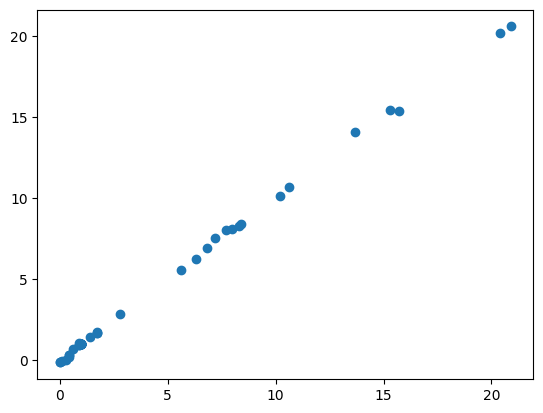

In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred=ridge.predict(X_test_scaled)
mea=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(Y_test,Y_pred)

Cross Validation Ridge

Mean Absolute Error 0.01609233457608464
R2 Score 0.9999634155822003


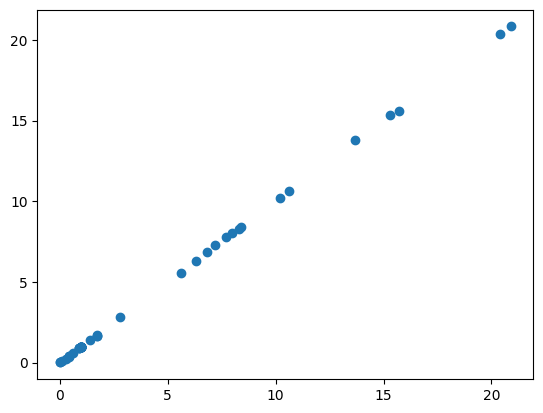

In [86]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
Y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean Absolute Error",mae)
print("R2 Score", score)
plt.show()



ELASTICNET REGRESSION

Mean Absolte error 0.01609233457608464
R2 Score 0.9409869097675014


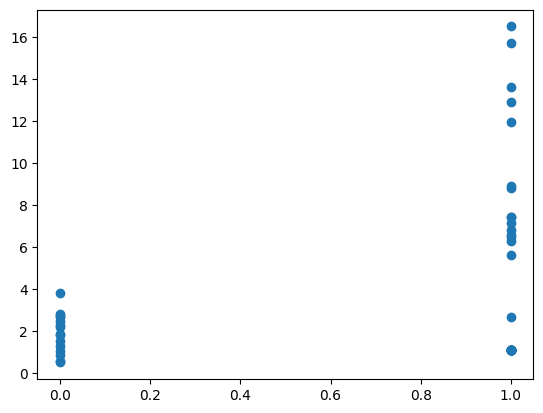

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,y_pred)
print("Mean Absolte error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean Absolte error 0.01609233457608464
R2 Score 0.9993958628474282


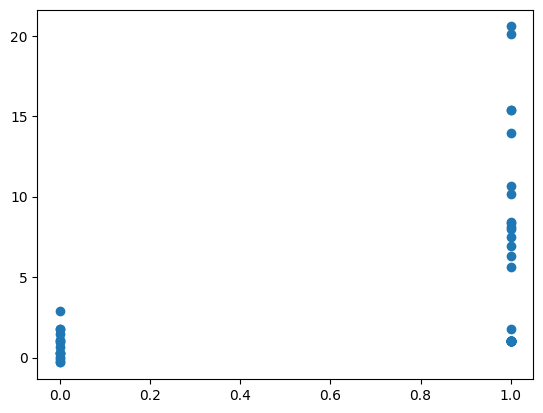

In [90]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,y_pred)
print("Mean Absolte error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [91]:
#pickel the machine learning models,preprocessing model standardscaler
scaler

StandardScaler()

In [92]:
ridge

Ridge()

In [95]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
